# Downloading Data
Let's download the data. The author has made a compressed file (containing a CSV file) which can be downloaded using below code. Making code to download and extract data is more helpful in exchanging code without sending in huge files of data as the code itself will download it.

In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(tarfile_name, housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, tarfile_name)
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
if not os.path.isfile(os.path.join(HOUSING_PATH, "housing.csv")):
    fetch_housing_data("housing.tgz")

# Let's Load the data
We should write a small function to load the data.

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Pandas DataFrame have `info()` function which is helpful to get quick description of the data.

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* Since there are 20640 rows, it is fairly small for ML standards but it is perfect to get started. 
* *Notice that total_bedrooms attribute have 20433 non-null values. This means 207 values are missing*.
* Also note that only ocean_proximity attribute is not numerical. It is of type object and thus can hold any kind of python object. The head() method used above displays repetitive value for the attribute. This means it is probably a categorical attribute.

To find the categories we can use `value_counts()` method

In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

***

Let's look at other fields. `describe()` method shows a summary of the numerical attributes. It will ignore null values. 
* `std` displays standard deviation. 
* `25%`, `50%` and `75%` value are the three quartile values or three percentiles. For example, 25% of housing_median_age have value lower than 18, 50% lower than 29 and 75% lower than 37.

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another way to get feel of type of data is plotting a histogram. Histogram represents the number of instance (on vertical axis) that have a given value range (on horizontal axis). We can use `hist()` method on the whole dataset.

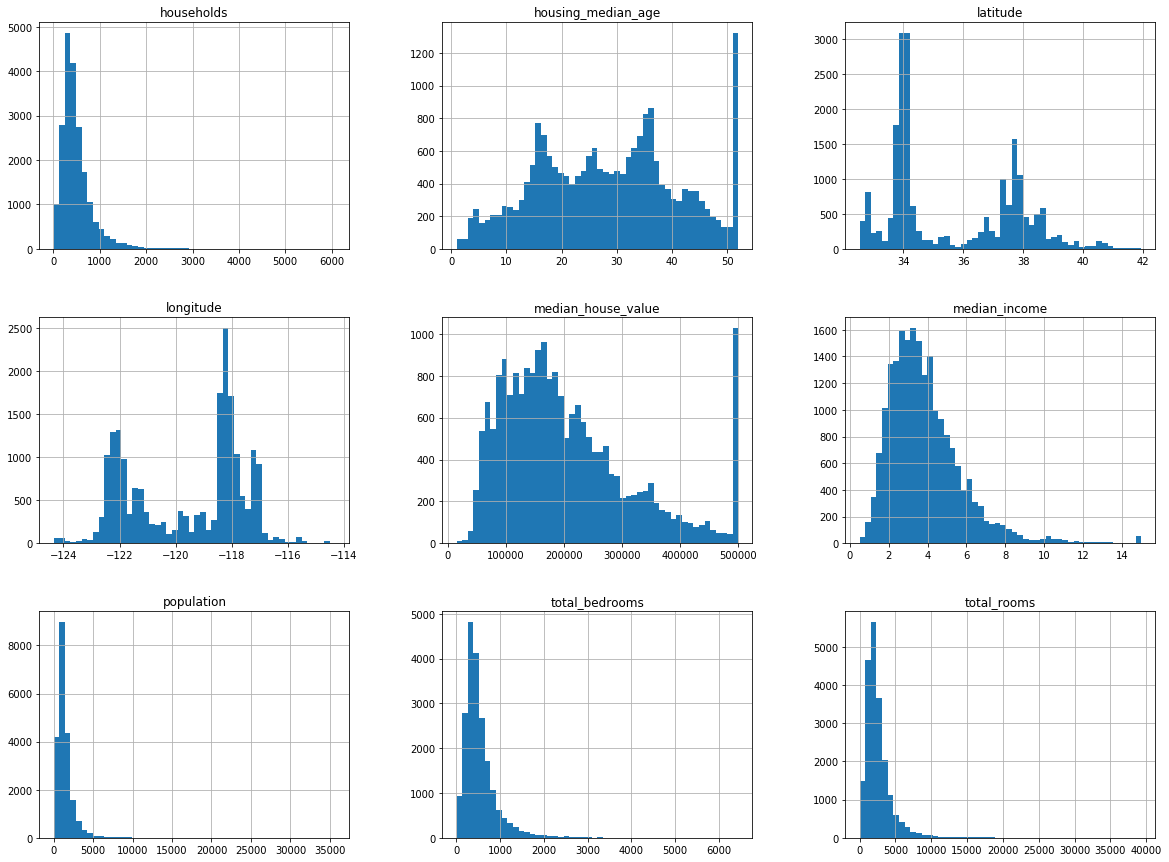

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

Few things to notice from histogram:
* Median income is not in USD - it is capped at 15 for higher median incomes and at 0.5 for lower median income.
* The housing median age and the median house value were also capped. The latter might be a problem as the system have to predict the median house value and it might learn that the price never goes above \$500,000. If values are needed precisely even above \$500,000, then you have mainly two options:
  * Collect proper labels for the districts who were capped.
  * Remove those districts from the training set and test set.
* These attributes have very different scales.
* Many histograms are *tail heavy*: they extend much farther to the right of the median than to the left (positively skewed). This can make it difficult for ML algorithms to detect patterns. We will transform it to get more of a bell shaped curves.

## WAIT!! BEFORE LOOKING FURTHER AT DATA - CREATE TEST SET
* Our data is a great pattern detector that means it is prone to overfitting: if you look at test set you might stumble upon a pattern and select a particular kind of Machine Learning model.
* Whenyou estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as expected. This is called *data snooping* bias.

Creating test set is easy, randomly take 20% instances and set them aside:

In [11]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

This will work fine and can be used like this:

In [12]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


**Difficulties with this approach**

This approach suggests that everytime your program runs a different test set will be taken at random, and thus in time your model would have seen all the data in the dataset.


**Some (might be) Solutions to avoid it:**
1. Save the test set on the first run and then lost it in subsequent runs
2. Set random number generator's seed (e.g., np.random.seed(42)) before calling np.random.permutation() so it will generate same shuffled indices.

**Issue with above solutions**: Both these solutions will break next time you fetch an uploaded dataset.

**Common Solution to above issue**:
* Use an identifier to decide whether or not it should go in the test set (assuming instances have a uniques and immutable identifier). For example, hash all the identifiers and keep last byte of it. If laste byte is less than or equal to 51 (20% of 256) take it as test set.
* This ensures test set is consistent even when the dataset is refreshed. The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.

***
> People often set seed to be 42. It has no special property, other than to be The Answer to the Ultimate Question of Life, the Universe, and Everything.
***

In [13]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

First we need to give the housing dataset an id. Simplest solution - add row index as ID.

In [14]:
housing_with_ID = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_ID, 0.2, "index")
print(len(train_set), "train +", len(test_set), "test")

16362 train + 4278 test


If you are using row index as ID, keep these in mind:
* Always append new data
* No row ever gets deleted

If this is not possible then use the most stable feature of the dataset to build a unique identifier. For example: a district's latitude and logitude are guaranteed to be stable for a few million years, so you could make an ID like this:

In [15]:
housing_with_ID['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_ID, 0.2, "id")
print(len(train_set), "train +", len(test_set), "test")

16267 train + 4373 test


* Scikit learn provides a few functions to split datasets into multiple subsets in various ways.
* Simplest: `train_test_split` which is similar to `split_train_test` with extra functionalities as:
  * Split more than 1 dataset with same number of rows
  * Takes a random state (seed)

```
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
```

**Creating Test Set when sample is small**:
* Using random sampling for small datasets can introduce significant *sampling bias*.
* Example, If a survey is done on 1000 people these 1000 people will not be entirely random selections. They will selected as a representation of population. USA's population composes 51.3% female and 48.7% male, so well-conducted survey will have 513 female and 487 men.
* This is called *stratefied sampling*
* The population is divided into homogeneous subgroups called *strata*, and right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population.

Suppose that you get to know from expert that median income is very important for prediction of median housing prices. So to make test set representative of this information.
* Convert median income to categorical
* Take sufficient instance from each stratum

In [16]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

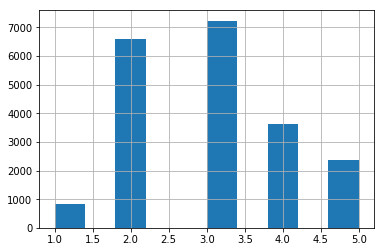

In [17]:
housing['income_cat'].hist()
plt.show()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [20]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights
First let's make our train set the only set we are dealing with

In [22]:
housing = strat_train_set.copy()

### Visualizing Geographical Data
Let's scatter plot latitude and longitude

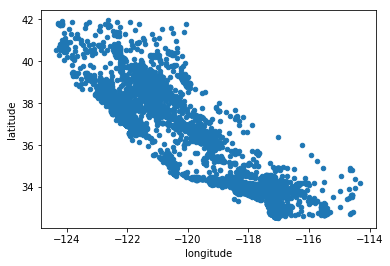

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude")

Let's bring out some patterns in this data:

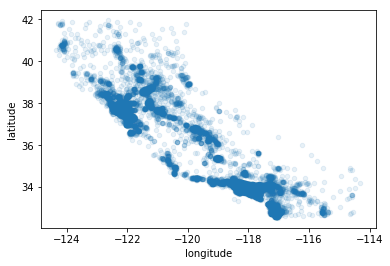

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # to see density of areas

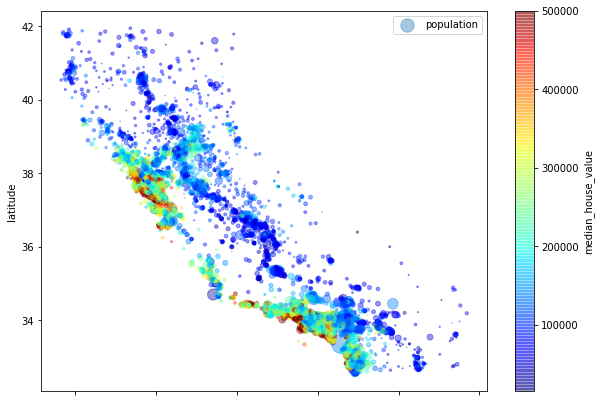

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", 
             alpha=0.4, s=housing['population'] / 100, label="population", figsize=(10, 7), 
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

If you want a proper plot with California map [see this script](https://github.com/piyush2896/HandsOnML-Notes/tree/master/PART1-TheFundamentalsOfML/Ch02-End2EndMLProject/visualize_pop.py)

### Looking for Correlations
Since dataset is not too large, you can eaily compute the *standard correlation coefficient* (also called *Pearson's r*) between every pair of attributes using the corr() method:

In [26]:
corr_matrix = housing.corr()

In [27]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


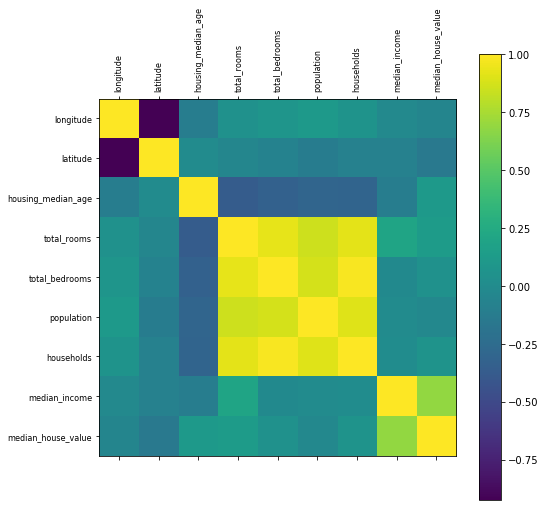

In [28]:
xticks = corr_matrix.index.values.astype('str')
yticks = corr_matrix.columns.values.astype('str')
plt.figure(figsize=(8, 8))
plt.matshow(corr_matrix, fignum=1)
plt.xticks(np.arange(0, len(xticks)), xticks, fontsize=8, rotation='vertical')
plt.yticks(np.arange(0, len(yticks)), yticks, fontsize=8)
plt.colorbar()
plt.show()

Let's see correlation with median hous value:

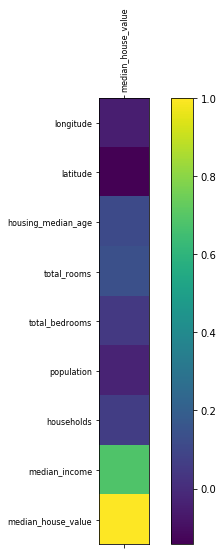

In [29]:
yticks = corr_matrix.columns.values.astype('str')
plt.figure(figsize=(8, 8))
plt.matshow(np.expand_dims(corr_matrix['median_house_value'], 1), fignum=1)
plt.xticks([0.], ['median_house_value'], fontsize=8, rotation='vertical')
plt.yticks(np.arange(0, len(yticks)), yticks, fontsize=8)
plt.colorbar()
plt.show()

Another way of checking the correlation between attributes is to use pandas' `scatter_matrix` function, which plots every numerical attribute against every other numerical attribute. Since there are 11 attributes, total graphs will be $11^2 = 121$. That is much more than required. Let's just work on most correlated values:

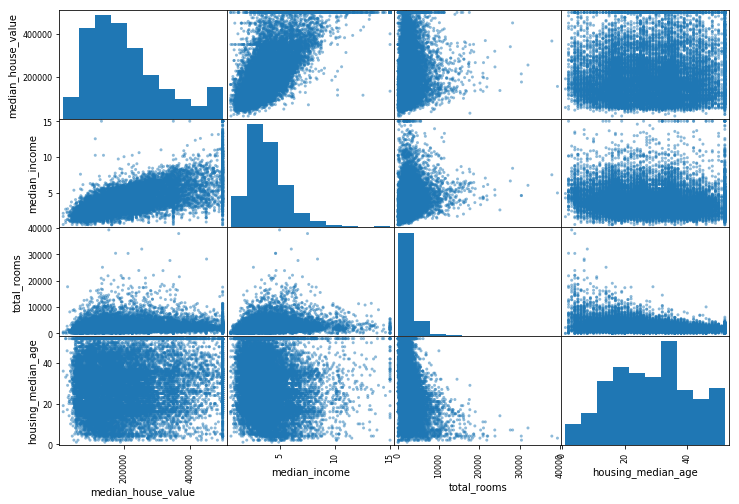

In [30]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

The most promising attribute to predict median house value is median income. Let's zoom in

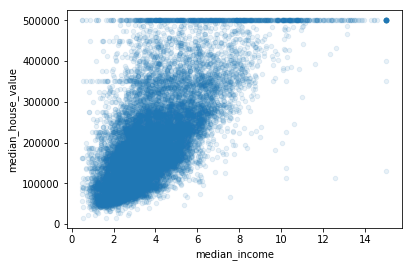

In [31]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

Plot displays a strong correlation. The price cap of \$500,000 we noticed is clearly visible. Other, less obvious straight horizontal lines are seen around - \$450,000 and \$350,000 and one around \$280,000. 

We may need to remove the corresponding districts to prevent algorithms from learning to reprocduce these data quirks.

## Experimenting With Attribute Combinations!!
Some examples of attribute combination requirement:
* Total number of rooms in a district is not as useful as total number of rooms per houshold! (Combine total rooms and number of households in a district)
* Total number of bedrooms in a district is not as useful as bedrooms per room.
* Population per household is more useful than total population in district.

In [32]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [33]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

`bedrooms_per_room` is much more correlated to `median_house_value` than total number of rooms or bedrooms. Houses with lower bedroom/room ration tend to be more expensive. `rooms_per_household` is more informative than `total_rooms`. Larger the houses, the more expensive they are.


**This is an iterative process, once you get a prototype up and running, you can analyze its output to gain more insights and come back to this exploration step.**

## Prepare the Data for ML Algorithms
Instead of doing this manually, write functions. Reasons:
* To reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).
* Gradually build a library of transformation functions that can be reused in any future projects.
* Use them in live systems to transform any data before feeding into algorithm.
* Will make it easy to try various transformations and see which combination of transformations works best.

Before going ahead let's revert to clean training set.

In [34]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning
Most ML algorithms cannot work with missing features. Create functions to take care of them!

`total_bedrooms` attribute has some missing values, to fix this we have 3 options:
* Get rid of corresponding districts.
* Get rid of the whole attribute.
* Set the values to some value (zero, the mean, the median, etc.)

```
housing.dropna(subset=[""total_bedrooms]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedroom"].fillna(medium, inplace=True)
```

**In case of option 3 save the median value to fill in missing value in test set and also for the live system.**

Scikit-Learn provides a handy class to take care of missing values: `Imputer`. Since it works only on numerical values drop all categorical once.

In [35]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [36]:
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [37]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


To read more about Scikit-Learn API design [see here](https://github.com/piyush2896/HandsOnML-Notes/tree/master/PART1-TheFundamentalsOfML/Ch02-End2EndMLProject/Sklearn_Design.md)

### Handling Text and Categorical Attributes
Let's convert text labels to numbers

Scikit-Learn provides transformer for this task called `LabelEncoder`:

In [39]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [40]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

**Issue with this approach*:** ML algorithm will assume two nearby values are more similar to two distant values.

To fix the issue, create one binary attribute per category: one attribute equal 1 when the category is "<1H OCEAN" (and 0 otherwise) and so on. This is called *one-hot encoding*, because only one attribute will be equal to 1 (hot), while the rest are 0 (cold).

Sklearn provides `OneHotEncoder` to convert categorical values into one-hot vectors. It takes 2D input but `housing_cat_encoded` is 1D so we need to reshape.

In [41]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

It returns a SciPy *sparse-matrix*. This ensures that if we have 1000s of different classes, our memory isn't full with a lot of 0s.

In [42]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

We can apply both transformations (from text to integer categories, then from integer categories to 1-hot vectors) in one-shot using `LabelBinarizer` class:

In [43]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

If you want spar-matrix from LabelBinarizer, pass sparse_output=True to the constructor

### Custom Transformers
* Might be required for custom cleanup operations or combining specific attributes.
* Must work seamslessly with Scikit-Learn functionalities (such as pipelines)
* Scikit-learn depends on [duck typing](https://en.wikipedia.org/wiki/Duck_typing)(not inheritance), so we only need to implement three methods: `fit()`, `transform()` and `fit_transform()`.
* Add `TransformerMixin` as base class to get the `fit_transform()` method.
* Add `BaseEstimator` as base class to avoid \*args and \*\*kwargs in constructor. It will also add two more mathods `get_params()` and `set_params()` that will be useful for automatic hyperparameter tuning. 

Below class adds the combined attributes discussed before.

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args and **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self # nothing else to do

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, 
                         population_per_household, bedrooms_per_room]
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attrbs = attr_adder.transform(housing.values)

Here, we have added `add_bedrooms_per_room` as a hyperparameter. This will help us find out wheter adding bedrooms per room will be helpful to ML algos.

**We can add a hyperparameter to gate any data preparation step that we are not 100% sure about. The more we automate these steps rhe more combinations can be tried automatically, making it much more likely to find great combinations.**

### Feature Scaling
* One of the most important transformation.
* ML algos perform poorly when input attributes have very different scales.
* Total number of rooms range from 6 to 39,320 while median incomes range from 0 to 15.
* Two common ways for scaling:
  * *min-max scaling* aka *normalization*
    * Convert data to range - \[0, 1\]
    * Subtract min value and divide by (max - min)
    * Sklearn transformer - `MinMaxScaler`
    * to change range in the transformer, use `feature_range` hyperparameter
  * *standardization*
    * Convert data for zero mean and unit variance.
    *  Subtract mean and divide by variance
    * Does not convert data to range \[0, 1\]
    * Is less affected by outliers
    * Sklearn transformer - `StandardScaler`

***
> As with all the transformations, it is important to fit scalers to training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).
***

### Transformation Pipelines
* There are many transformation steps that need to be executed in right order.
* Sklearn provides the `Pipeline` class to help with sequence to transformations
* Example of a pipeline:

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

* The `Pipeline` constructor takes a list of name/estimator pairs defining a sequence of steps.
* The last estimator must be a transformers (i.e., they must have a `fit_transform()` method).
* The names can be anything you like (as long as they don't contain double underscores '__')

It would be nice to have a transformer to convert pandas DataFrame to numerical numpy values directly.

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [47]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer())
])

* Combine the pipelines into single pipeline using Sklearn's `FeatureUnion` class.
* You give it a transformer (which can be entier transformer pipelines) and it calls them in parallel concatenates them and return the output.

In [48]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [49]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [50]:
housing_prepared.shape

(16512, 16)

## Select and Train a Model
What is done?
* Framed problem
* Got the data and explored it
* Sampled a training and a test set
* Wrote transformation pipelines

What is left?
* Select, Train, Evaluate, Finte Tune on Train and Cross Validation
* Evaluate on Test and Launch the model!

### Training and Evaluating on Training Set
Linear Regression model:

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Trying it out!

In [52]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]

some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Let's measure RMSE score:

In [53]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

* Most `median_housing_values` range from \$120,000 and \$250,000 so the prediction will be off by a margin of \$68,628
* This is an example of model underfitting the training data.
* There can be two reasons for this:
  * Features do not provide enough information to make good predictions, or
  * The model is not good enough.

* We can add more data but first let's try more powerful model:

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [55]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This is weird, but we need to evaluate it for overfitting.

### Better Evaluation Using Cross-Validation
* Use sklearn's *cross-validation* features.
* *k-fold cross-validation*:
  * Randomly split training set into k distinct subsets called *folds*
  * Evaluate `DecisionTreeRegresssor` k times by training on k-1 folds and testing on remaining 1 fold.

In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [59]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [60]:
display_scores(tree_rmse_scores)

Scores: [68531.17304004 67028.64416369 71391.77737129 70120.78967351
 70199.52153269 74264.70125745 71909.20771032 69958.12724379
 76756.25879132 70379.55493294]
Mean: 71053.97557170523
Standard Deviation: 2636.186741334304


***
> Sklearn cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of MSE, that is why the code computes sqrt of `-scores`
***

In [61]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation: 2731.6740017983425


Decision Tree is overfitting badly that it performs worst than Linear Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [63]:
np.sqrt(mean_squared_error(housing_labels, forest_reg.predict(housing_prepared)))

22508.421366241862

In [64]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [52051.5017224  50194.66216991 52274.49071678 54319.86883327
 52272.15766126 55538.28655271 52586.30990122 51321.9907284
 55119.54843393 52938.44350255]
Mean: 52861.7260222443
Standard Deviation: 1590.6782303365223


The goal is to shortlist a few (two to five) promising models!

***
> You should save every model you experiment with so you can come back easily to any model you want. Make sure you save both the hyperparameters and the trained parameters, as well as the cross validation scores and perhaps the actual prediction as well. This will allow you to easily compare scores across model types, and compare the types of error they make. Saving sklearn model:
***

In [65]:
from sklearn.externals import joblib
joblib.dump(forest_reg, 'forest.pkl')

del forest_reg

forest_reg = joblib.load('forest.pkl')

In [66]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [52724.39853694 49130.10334486 51325.16659029 54956.42912986
 52480.10606041 56755.07472803 51632.84193156 49166.610694
 55640.14463414 52421.3447727 ]
Mean: 52623.22204228019
Standard Deviation: 2418.7847800553254


## Fine-Tune Your Model
After shortlisting promising models. We need to fine tune them!

### Grid Search
* Give it hyperparameters to fiddle with and their possible values and it will find out the best possible combination for given model.

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':[2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [68]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

* The param grid made tells grid search to first work on 3x4=12 possible combinations of `n_estimators` and `max_features` and then work on 2x3=6 combinations of the same params but when `bootstrap` is False.
* In total it works on 12+6=18 combinatons.

***
> Since 8 and 30 were the best values this means you should continue to search with higher values, since scores might continue to increase.
***

In [69]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

***
> if `GridSearchCV` is initialized with `refit=True` (default), then once it finds the best estimator, it retrains it on the whole training set. This is usually good since feeding it more data will likely improve its performance.
***

In [71]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64444.54596926226 {'n_estimators': 3, 'max_features': 2}
55432.70849679936 {'n_estimators': 10, 'max_features': 2}
52936.66042331953 {'n_estimators': 30, 'max_features': 2}
60670.35830798309 {'n_estimators': 3, 'max_features': 4}
52912.22232043332 {'n_estimators': 10, 'max_features': 4}
50412.99577951089 {'n_estimators': 30, 'max_features': 4}
58827.380423034105 {'n_estimators': 3, 'max_features': 6}
52175.6590030737 {'n_estimators': 10, 'max_features': 6}
50173.22757809321 {'n_estimators': 30, 'max_features': 6}
57898.09574446978 {'n_estimators': 3, 'max_features': 8}
52304.73987654167 {'n_estimators': 10, 'max_features': 8}
50013.77895647254 {'n_estimators': 30, 'max_features': 8}
62009.40068858031 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
53949.36291513021 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
60193.83843490865 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
52358.2712777486 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}

**We can use `add_bedrooms_per_room` hyperparameter as well in similar manner**

### Randomized Search
* When the hyperparameter *search space* is large, it is often preferable to use `RandomSearchCV`.
* Two main benefits:
  * If is it ran for 1000 iterations it will explore 1000 different values for each hyperparameter.
  * More control over the computing budget we want to allocate for hyperparameter search, simply by setting the number of iterations.

### Ensemble Methods
* Combine models that perform best.
* Group (or 'ensemble') will perform better than individual model.
* Especially if different models make different types of mistakes.

### Analyze the Best Models and Their Errors
* We can gain good insights by inspecting the best models.
* Example, Random Forest can indicate the relative importance of each attribute for making accurate predictions:

In [73]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.03301238e-02, 6.65545483e-02, 4.38097898e-02, 1.52563657e-02,
       1.50927920e-02, 1.47441038e-02, 1.40127309e-02, 3.33525317e-01,
       4.64557904e-02, 1.09773864e-01, 8.83281937e-02, 4.81805491e-03,
       1.71857721e-01, 8.92184302e-05, 1.89994259e-03, 3.45144461e-03])

In [74]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.33352531656209666, 'median_income'),
 (0.1718577207856059, 'INLAND'),
 (0.1097738637316791, 'pop_per_hhold'),
 (0.08832819371511601, 'bedrooms_per_room'),
 (0.07033012384421139, 'longitude'),
 (0.06655454827499534, 'latitude'),
 (0.04645579035322949, 'rooms_per_hhold'),
 (0.04380978977789285, 'housing_median_age'),
 (0.01525636574424009, 'total_rooms'),
 (0.015092792029867935, 'total_bedrooms'),
 (0.014744103754775476, 'population'),
 (0.01401273089090092, 'households'),
 (0.004818054905062773, '<1H OCEAN'),
 (0.003451444609981216, 'NEAR OCEAN'),
 (0.001899942590172489, 'NEAR BAY'),
 (8.92184301724002e-05, 'ISLAND')]

We can now try dropping less useful attributes.

## Evaluate on Test Set
* After tweaking for a while, its time to evaluate on test set.

In [75]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)
final_rmse

47651.79681148734

## Project Prelaunch!!
* Present your solution:
  * High-light what you have learnt
  * What worked and what did not work
  * What assumptions were made
  * Limitations of the system built
* Document Everyhting
* Create nice presentation and clear visualizations
* easy-to-remember statements

## Launch Monitor and Mantain Your System
* Need to get system ready for production - plugging the input data sources into your system and writting tests.
* Write monitoring code to check system's live performance at regular intervals and trigger alerts when it drops.
  * Required to catch sudden breakage or performance degradation.

**Models tend to 'rot' as data evolves over time, unless the models are regularly trained on fresh data.**

* Evaluating requires plugging in human analysts to evaluate system predictions using their expertise in the field.

* Make sure to evaluate quality of the input data. It can degrade due to many reasons like Malfunctioning sensor. It may be difficult to catch this only by model's prediction quality degradation. So pre-evaluations might help.

* Try to automate the process of model training over new data.

# EXERCISE SOLUTIONS
**COMING SOON**